<a href="https://colab.research.google.com/github/FBallert/vae_fashion_mnist_T3M40508/blob/main/AE_LatentShowcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [220]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [221]:
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

In [222]:
inputs = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = tf.keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(inputs)
# x = tf.keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
#x = tf.keras.layers.Flatten()(inputs)
#x = tf.keras.layers.Dense(128, activation='relu')(x)
#x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
z = tf.keras.layers.Dense(2, activation='relu')(x)

# Create a dedicated encoder model to get the latent representation for the images later
encoder = tf.keras.Model(inputs, z)

# Decoder
x = tf.keras.layers.Dense(16, activation='relu')(z)
# print(x.shape)
x = tf.keras.layers.Dense(14 * 14 * 32, activation='relu')(x)
x = tf.keras.layers.Reshape((14, 14, 32))(x)
# print(x.shape)
# x = tf.keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
# print(x.shape)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
# print(x.shape)
outputs = tf.keras.layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
# print(outputs.shape)
#x = tf.keras.layers.Dense(64, activation='relu')(x)
#x = tf.keras.layers.Dense(128, activation='relu')(x)
#x = tf.keras.layers.Dense(784, activation='relu')(x)
# outputs = tf.keras.layers.Reshape((28, 28, 1))(x)

autoencoder = tf.keras.Model(inputs, outputs, name='classical_conv_autoencoder')

autoencoder.summary()

Model: "classical_conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
flatten_16 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 16)                100368    
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_73 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_74 (Dense)             (None, 6272

In [223]:
# This is our encoded (32-dimensional) input
latent_input = tf.keras.Input(shape=(2))
# Retrieve the last layer of the autoencoder model
decoder_layers = autoencoder.layers[5:10]

# For convenience
decoded = latent_input
for layer in decoder_layers:
  print(layer.name)
  decoded = layer(decoded)
# Create the decoder model
decoder = tf.keras.Model(latent_input, decoded)

dense_73
dense_74
reshape_17
conv2d_transpose_30
conv2d_transpose_31


In [224]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy())

In [225]:
history = autoencoder.fit(x_train, x_train,
          batch_size=128, epochs=30)

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.4507
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3471
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3392
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3347
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3333
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3320
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3305
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3296
Epoch 9/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3294
Epoch 10/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3282
Epoch 11/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3274
Epoch 12/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3272
Epoch 13/30
469/469 [====

In [226]:
latent_values = encoder.predict(x_train)

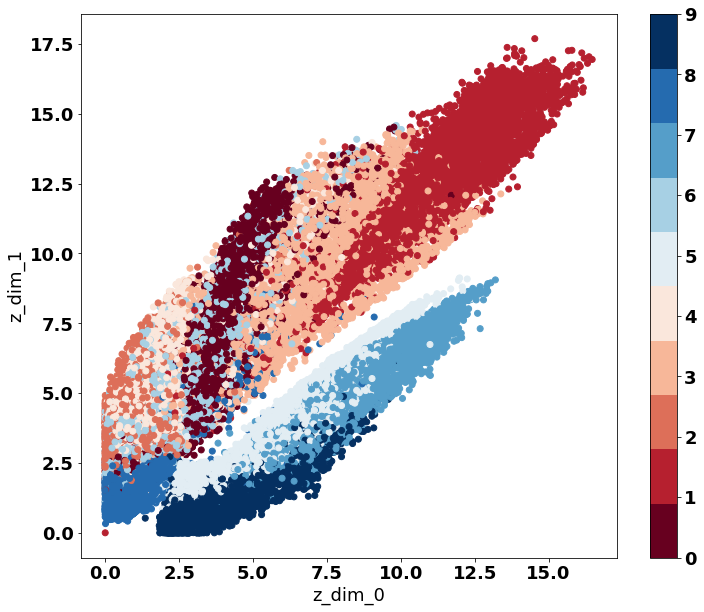

In [239]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
cmap = plt.get_cmap('RdBu', 10)
plt.scatter(latent_values[:, 0], latent_values[:, 1], c=y_train, cmap=cmap)
plt.colorbar()
plt.xlabel("z_dim_0")
plt.ylabel("z_dim_1")
plt.show()

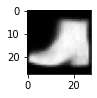

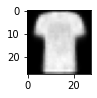

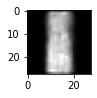

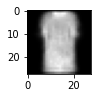

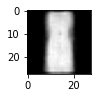

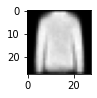

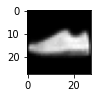

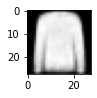

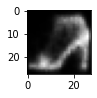

In [228]:
figures = autoencoder.predict(x_train)

from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(np.reshape(figures[i], (28, 28)), cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [229]:
np.where(y_train == 1)

(array([   16,    21,    38, ..., 59989, 59991, 59996]),)

[12.023445 13.45594 ]
[0.001 0.001]


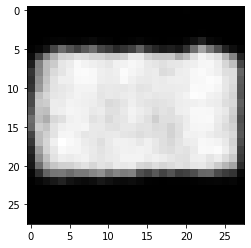

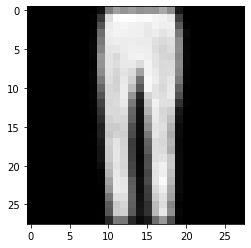

In [230]:
import random
latent_values = encoder.predict(x_train)
# For reproducability
random.seed(23)
random_example_idx = random.randint(0, len(x_train))
print(latent_values[random_example_idx])
latent_values[random_example_idx][0] = 0.001 #latent_values[random_example_idx][0] - 2
latent_values[random_example_idx][1] = 0.001
figure = decoder.predict(np.reshape(latent_values[random_example_idx], (1, 2)))
print(latent_values[random_example_idx])

pyplot.imshow(np.reshape(figure, (28, 28)), cmap=pyplot.get_cmap('gray'))
pyplot.show()
pyplot.imshow(np.reshape(figures[random_example_idx], (28, 28)), cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [231]:
# Implementation taken from https://keras.io/examples/generative/vae
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
vae.fit(x_train, epochs=30, batch_size=128)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_48 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 14, 14, 32)   320         input_48[0][0]                   
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 7, 7, 64)     18496       conv2d_21[0][0]                  
__________________________________________________________________________________________________
flatten_17 (Flatten)            (None, 3136)         0           conv2d_22[0][0]                  
____________________________________________________________________________________________

In [232]:
vae_z = vae.encoder.predict(x_train)

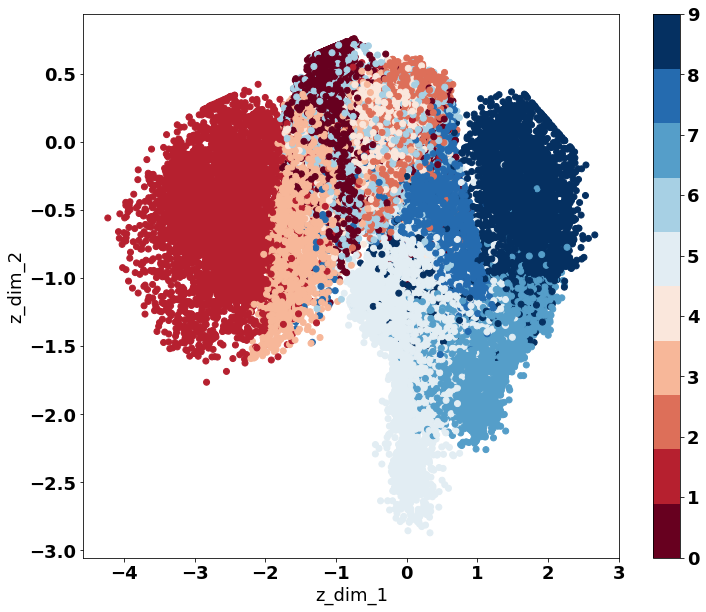

In [238]:
font = {'family' : 'times',
        'size'   : 18}

plt.rc('font', **font)
cmap = plt.get_cmap('RdBu', 10)
plt.figure(figsize=(12, 10))
plt.scatter(vae_z[0][:, 0], vae_z[0][:, 1], c=y_train, cmap=cmap)
plt.colorbar()
plt.xlabel("z_dim_0")
plt.ylabel("z_dim_1")
plt.show()

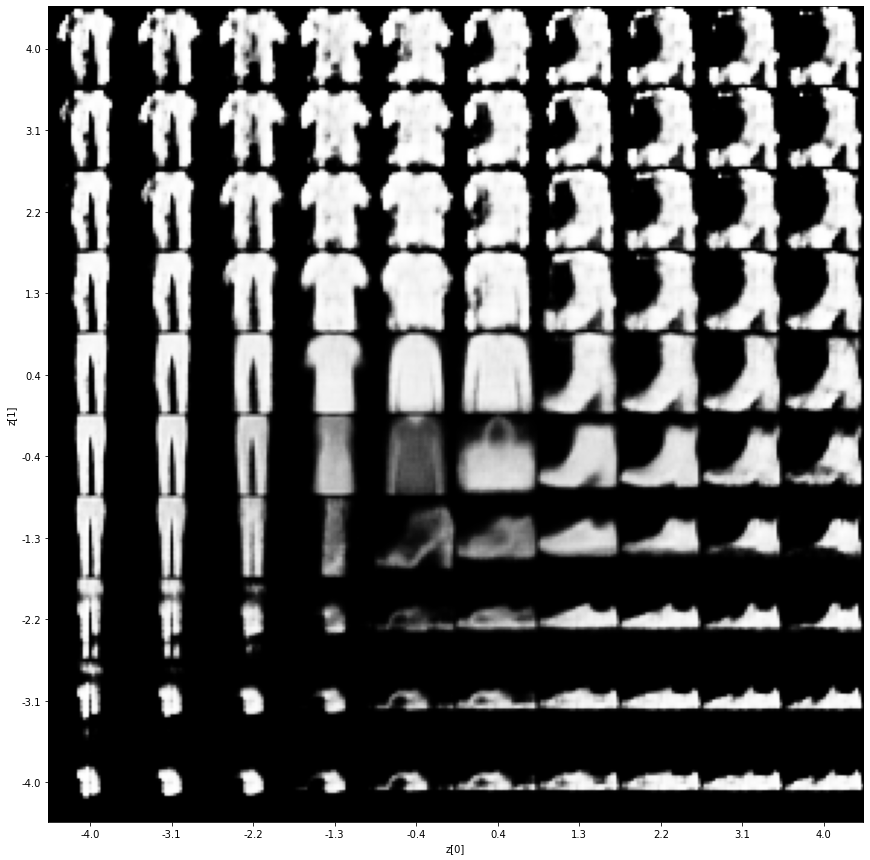

In [235]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=10, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 4
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            # x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)